# Analysis of Student Performance Indicators

### The Data:
The dataset contains about 6600 entries and 20 variables related to student performance:
- Hours_Studied                          
- Attendance                             
- Parental_Involvement                  
- Access_to_Resources                  
- Extracurricular_Activities            
- Sleep_Hours                             
- Previous_Scores                        
- Motivation_Level                      
- Internet_Access                       
- Tutoring_Sessions                       
- Family_Income                         
- Teacher_Quality                    
- School_Type                        
- Peer_Influence                   
- Physical_Activity                       
- Learning_Disabilities                  
- Parental_Education_Level      
- Distance_from_Home         
- Gender                     
- Exam_Score

### The Objective:
The objective of this project is to use pythons libraries to analyze the key factors that effect the students' performance and determine how they are effecting it.
<br>
<br>
<br>

## Import Required libraries:
The libraries used in this project are:
- <code>pandas</code>: data structuring, cleaning and extraction
- <code>numpy</code>: statistical computations
- <code>matplotlib</code> and <code>seaborn</code>: visualizing data to identify relatioships and patterns
- <code>scikit-learn.impute</code>: data cleaning, removing null values
- <code>scikit-learn.preprocessing</code>: Encoding categorical data into numerical

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

<br>
<br>
<br>

## Get the data:

In [2]:
data= pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df= pd.DataFrame(data)
df.iloc[0]

Hours_Studied                          23
Attendance                             84
Parental_Involvement                  Low
Access_to_Resources                  High
Extracurricular_Activities             No
Sleep_Hours                             7
Previous_Scores                        73
Motivation_Level                      Low
Internet_Access                       Yes
Tutoring_Sessions                       0
Family_Income                         Low
Teacher_Quality                    Medium
School_Type                        Public
Peer_Influence                   Positive
Physical_Activity                       3
Learning_Disabilities                  No
Parental_Education_Level      High School
Distance_from_Home                   Near
Gender                               Male
Exam_Score                             67
Name: 0, dtype: object

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


<br>
<br>
<br>

## Data Cleaning

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

#### Fill null values in categorical columns with most frequent values

In [6]:
categorical_cols = ['Teacher_Quality', 'Parental_Education_Level','Distance_from_Home']
mode_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])

<br>
<br>
<br>

## Data Encoding

#### Label encoding for ordered data

In [7]:
label_encoder = LabelEncoder()
labels=['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality','Distance_from_Home']
for col in labels:
    df[col] = label_encoder.fit_transform(df[col])

#### One-Hot encoding for unordered data

In [8]:
df = pd.get_dummies(df, columns=['School_Type','Extracurricular_Activities','Internet_Access','Gender'], drop_first=True)

In [9]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,Positive,3,No,High School,2,67,True,False,True,True
1,19,64,1,2,8,59,1,2,2,2,Negative,4,No,College,1,61,True,False,True,False
2,24,98,2,2,7,91,2,2,2,2,Neutral,4,No,Postgraduate,2,74,True,True,True,True
3,29,89,1,2,8,98,2,1,2,2,Negative,4,No,High School,1,71,True,True,True,True
4,19,92,2,2,6,65,2,3,2,0,Neutral,4,No,College,2,70,True,True,True,False


<br>
<br>
<br>

## Exploratory Data Analysis

#### Histograms to analyse distribution

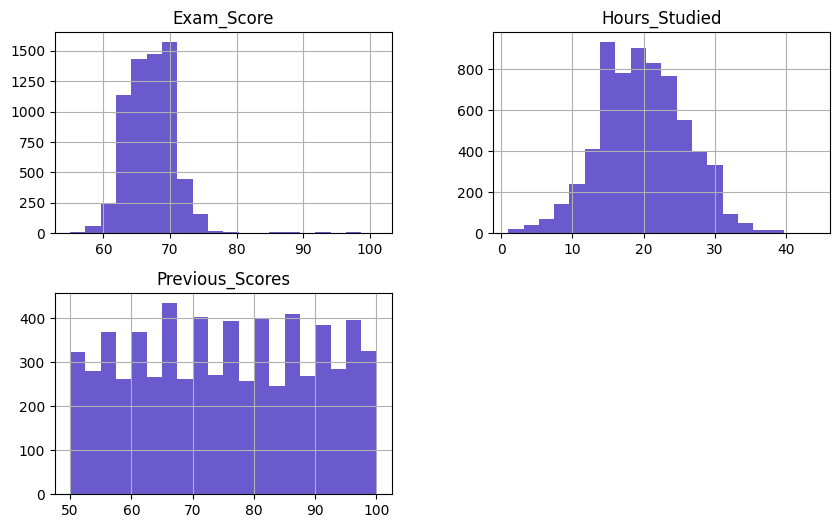

In [54]:
continuous_cols = ['Exam_Score', 'Hours_Studied', 'Previous_Scores']
df[continuous_cols].hist(bins=20, figsize=(10, 6), layout=(2, 2), color='slateblue')
plt.show()

##### Initial Insights:
- The distribution of Exam_Score is left-skewed, with the majority of students scoring between 65 to 75.
- A very small number of students have scores above 85 or below 60, indicating few extreme performances.
- The Hours_Studied variable shows a normal distribution, centered around 15 to 20 hours.
- Students' past performances vary greatly and don't follow a specific trend or distribution pattern.

<br>

#### Box Plot to Identify Outliers

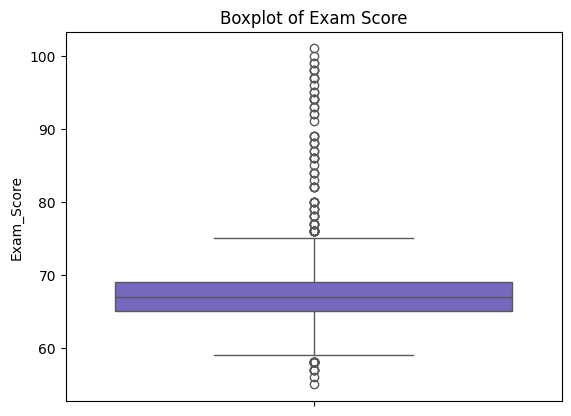

In [55]:
sns.boxplot(df['Exam_Score'], color= "slateblue")
plt.title('Boxplot of Exam Score')
plt.show()

##### Initial Insights:
- Most students scored between 65 and 75.
- The range of exam scores is between 60 to 80. But, several outliers can be identified with seom scores reaching as high as 100.

<br>

#### Correlation Matrix to identify KPIs

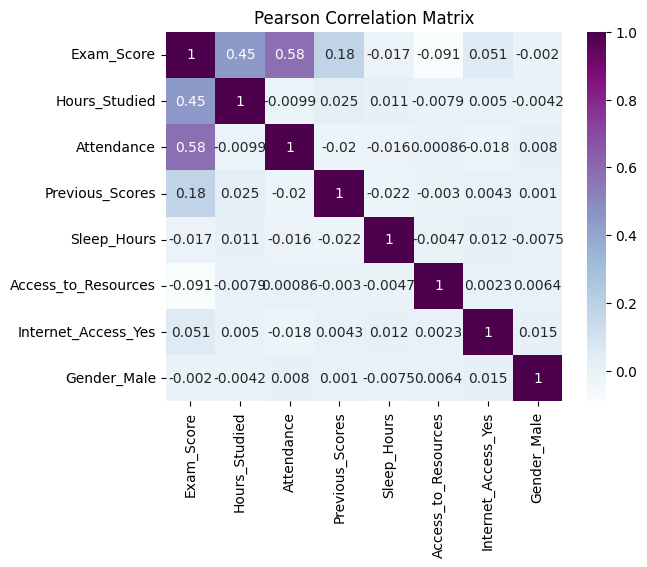

In [72]:
correlation_matrix = df[['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores','Sleep_Hours','Access_to_Resources','Internet_Access_Yes','Gender_Male']].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Pearson Correlation Matrix')
plt.show()

##### Initial Insights:
- The number of hours a student studies significantly effects their exam scores.
- Attendance also plays a role in students' scores.
- A students previous score and present score do not depend on each other,i.e., present scores cannot be predicted based on previous scores.
- Sleep hours of a student do not affect their scores significantly.

<br>

#### Others

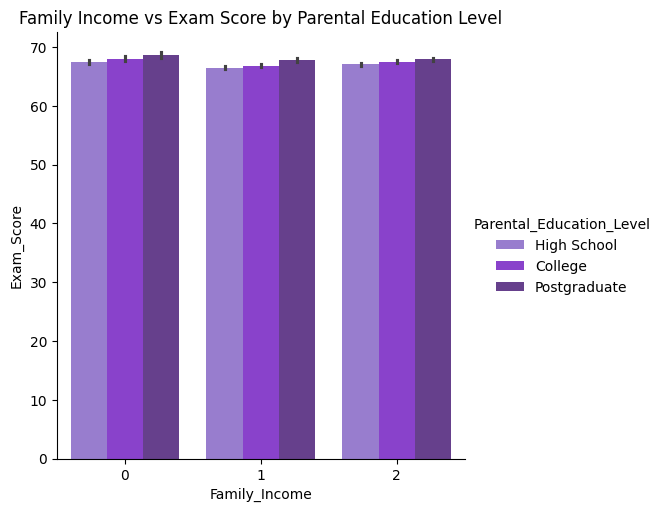

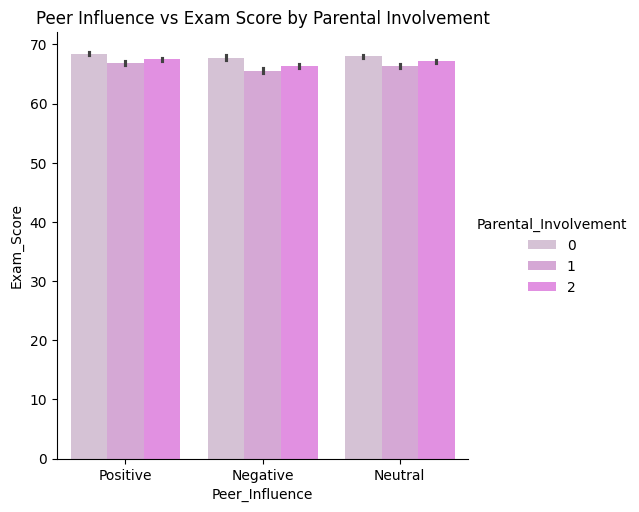

In [67]:
# Interaction between Family income and Parental_education level
sns.catplot(x="Family_Income", y="Exam_Score", hue="Parental_Education_Level", kind="bar", data=df, palette=['mediumpurple','blueviolet','rebeccapurple'])
plt.title('Family Income vs Exam Score by Parental Education Level')
plt.show()

# Interaction between Peer_Influence and Parental_Involvement
sns.catplot(x="Peer_Influence", y="Exam_Score", hue="Parental_Involvement", kind="bar", data=df,palette=['thistle','plum','violet'])
plt.title('Peer Influence vs Exam Score by Parental Involvement')
plt.show()



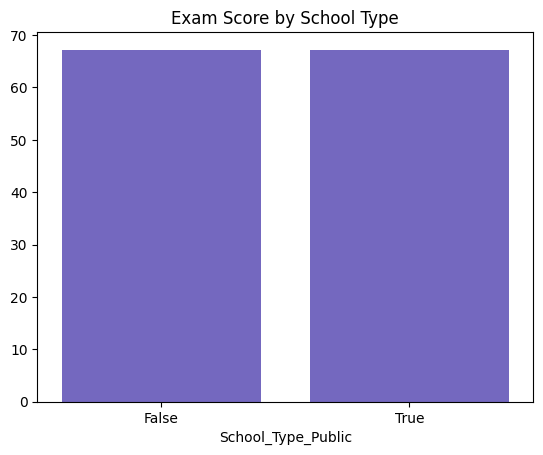

In [66]:
sns.barplot(x='School_Type_Public', y=df['Exam_Score'].mean(), data=df, color='slateblue')
plt.title('Exam Score by School Type')
plt.show()

##### Initial Insights:
- Regardless of income level, the average score remains around 70 for all three categories.
- Students whose parents have a Postgraduate education (green bars) perform slightly better, but the difference is very small.
- Neither Family_Income nor Parental_Education_Level has a strong direct impact on students' exam scores in this dataset.
- The school type of the student also has no impact. Regardless of the type, the average score is between 60 and 70.

<br>
<br>
<br>

## Hypothesis Testing

#### Hypothesis 1: Higher Hours_Studied results in better exam scores


In [25]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(df['Hours_Studied'], df['Exam_Score'])

print(f'Pearson Correlation: {corr}')
print(f'P-value: {p_value}')

Pearson Correlation: 0.44545495407528185
P-value: 1.28635e-319


<br>

- There exists a moderate positive correlation between Hours Studied and Exam Score. As the number of hours studied increases, the exam scores tend to increase as well, but the correlation is not strong.
- As the p-value is very small, we can conclude that there is a significant relationship between Hours Studied and Exam Score.

<br>

#### Hypothesis 2: Students with greater Teacher_Quality perform better

In [39]:
from scipy.stats import ttest_ind

# T-Test for Parental Involvement
involvement_levels = df['Teacher_Quality'].unique()

for level in involvement_levels:
    subset = df[df['Teacher_Quality'] == level]['Exam_Score']
    print(f'Mean Exam Score for {level}: {subset.mean()}')

# Perform T-Test for two levels of Parental Involvement
group1 = df[df['Teacher_Quality'] == 0]['Exam_Score']
group2 = df[df['Teacher_Quality'] == 2]['Exam_Score']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-Test for Teacher Quality: t-statistic={t_stat}, p-value={p_value}')

Mean Exam Score for 2: 67.10017486884837
Mean Exam Score for 0: 67.6769388803287
Mean Exam Score for 1: 66.75342465753425
T-Test for Teacher Quality: t-statistic=5.37998620379881, p-value=7.733746063443812e-08


<br>

- A t-statistic of 5.38 indicates a strong difference in the mean scores across the levels of Teacher Quality.

<br>

#### Hypothesis 3: More Physical_Activity correlates with better performance due to improved cognitive function

In [28]:
corr, p_value = pearsonr(df['Physical_Activity'], df['Exam_Score'])

print(f'Pearson Correlation for Physical Activity: {corr}')
print(f'P-value: {p_value}')

Pearson Correlation for Physical Activity: 0.02782443618025742
P-value: 0.02371741508672264


- This value is very close to zero, suggesting that, in this dataset, physical activity does not have a significant impact on exam performance.

<br>
<br>
<br>

## Conclusion:

**The Key features affecting Students' Exam Scores are:**
- Hours Studied: Students who study more number of hours tend to score high in the exams.
- Attendance: Students attending regularly have high exam scores
- Parental Involvement: Students' exam scores increase with more parental involvement. However this difference is quite small.
- Parents Education level Students whose parents have a Postgraduate education (green bars) perform slightly better, but the difference is very small.

**The features not affecting Students' Exam Scores are:**
- Family income
- School Type
- Peer Influence
- Gender
- Internet Access
- Access to Resources